In [1]:
import os.path
import numpy as np
import pickle
from sklearn import metrics
import pandas as pd

In [21]:
path = os.getcwd()
with open(path + '/data/RFpredval.pkl', 'rb') as file:
    RF_val = pickle.load(file)
with open(path + '/data/SVRpredval.pkl', 'rb') as file:
    SVR_val = pickle.load(file)
with open(path + '/data/REGpredval.pkl', 'rb') as file:
    REG_val = pickle.load(file)
with open(path + '/data/XGBpredval.pkl', 'rb') as file:
    XGB_val = pickle.load(file)
    
with open(path + '/data/RFpredtrain.pkl', 'rb') as file:
    RF_train = pickle.load(file)
with open(path + '/data/SVRpredtrain.pkl', 'rb') as file:
    SVR_train= pickle.load(file)
with open(path + '/data/REGpredtrain.pkl', 'rb') as file:
    REG_train = pickle.load(file)
with open(path + '/data/XGBpredtrain.pkl', 'rb') as file:
    XGB_train = pickle.load(file)
    
    
with open(path + '/data/yTrainValTest.pkl', 'rb') as file:
    y_train,y_val,y_test= pickle.load(file) 


In [10]:
SVR_val[0]['y_pred_svr']

365     49751.563433
5538    36432.100842
5169    36923.643101
5777    69794.626942
4937    93070.478081
            ...     
4497    75734.384725
974     58573.467430
738     99736.730107
3898    48545.202570
1772    96885.130406
Name: y_pred_svr, Length: 946, dtype: float64

In [42]:
def mean_absolute_percentage_error(y_true, y_pred): 

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_range_percentage_error(y_true, y_pred): 
    error = np.abs((y_true- y_pred))-10000
    error[error < 0] = 0
    return np.mean(error/y_true)*100

In [23]:
print(' SVR Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, SVR_val[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, REG_val[0]['y_pred_reg'])))
print(' rf Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, RF_val[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error: {0:.0f}'.format( metrics.mean_absolute_error(y_val, XGB_val[0]['y_pred_xgb'])))
print(' ')
print(' SVR Mean Absolute Error (train) : {0:.0f}'.format( metrics.mean_absolute_error(y_train, SVR_train[0]['y_pred_svr'])))
print(' Linear Reg Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, REG_train[0]['y_pred_reg'])))
print(' rf Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, RF_train[0]['y_pred_rf'])))
print(' XGB Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, XGB_train[0]['y_pred_xgb'])))

# print('Mean Absolute Percentage Error: {0:.1f}'.format(mean_absolute_percentage_error(y_val, y_pred)))
# print('Mean Absolute Range Percentage Error: {0:.1f}'.format(mean_absolute_range_percentage_error(y_val, y_pred)))

 SVR Mean Absolute Error: 19547
 Linear Reg Mean Absolute Error: 13371
 rf Mean Absolute Error: 13873
 XGB Mean Absolute Error: 13102
 
 SVR Mean Absolute Error (train) : 19031
 Linear Reg Mean Absolute Error (train): 9125
 rf Mean Absolute Error (train): 7224
 XGB Mean Absolute Error (train): 7485


In [29]:
train_pred = pd.DataFrame([y_train,SVR_train[0]['y_pred_svr'],REG_train[0]['y_pred_reg'],RF_train[0]['y_pred_rf'],XGB_train[0]['y_pred_xgb']]).T
val_pred = pd.DataFrame([y_val,SVR_val[0]['y_pred_svr'],REG_val[0]['y_pred_reg'],RF_val[0]['y_pred_rf'],XGB_val[0]['y_pred_xgb']]).T

In [30]:
train_pred .columns

Index(['salary_average_euros', 'y_pred_svr', 'y_pred_reg', 'y_pred_rf',
       'y_pred_xgb'],
      dtype='object')

In [35]:
from sklearn.linear_model import LinearRegression
X = train_pred[[ 'y_pred_reg',
       'y_pred_xgb']]
y = train_pred ['salary_average_euros']

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_all_pred_train = model.predict(X)
y_all_pred_val = model.predict(val_pred[[ 'y_pred_reg',
       'y_pred_xgb']])

In [47]:
print('Ensemble Mean Absolute Error (train): {0:.0f}'.format( metrics.mean_absolute_error(y_train, y_all_pred_train)))
print('Ensemble Mean Absolute Error (val): {0:.0f}'.format( metrics.mean_absolute_error(y_val, y_all_pred_val)))


print('Ensemble Mean Absolute range % Error (train): {0:.1f}'.format( mean_absolute_range_percentage_error(y_train, y_all_pred_train)))
print('Ensemble Mean Absolute range % Error (val): {0:.1f}'.format( mean_absolute_range_percentage_error(y_val, y_all_pred_val)))


print('R2 (train): {0:.2f}'.format( metrics.r2_score(y_train, y_all_pred_train)))
print('R2 (val): {0:.2f}'.format( metrics.r2_score(y_val, y_all_pred_val)))

Ensemble Mean Absolute Error (train): 7174
Ensemble Mean Absolute Error (val): 12718
Ensemble Mean Absolute range % Error (train): 2.5
Ensemble Mean Absolute range % Error (val): 8.5
R2 (train): 0.94
R2 (val): 0.78


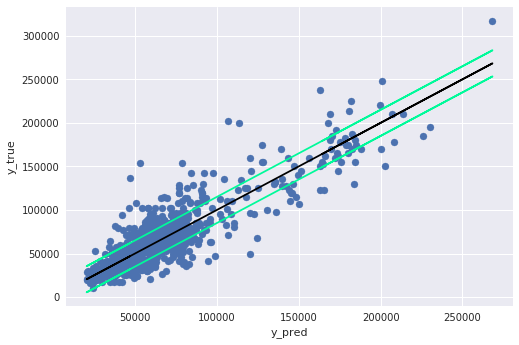

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
with plt.style.context('seaborn'):
    ax = plt.scatter(y_all_pred_val,y_val)
    plt.plot(y_all_pred_val,y_all_pred_val, color='black')
    plt.plot(y_all_pred_val, y_all_pred_val-15000, color='mediumspringgreen')
    plt.plot(y_all_pred_val, y_all_pred_val+15000, color='mediumspringgreen')
    plt.xlabel('y_pred')
    plt.ylabel('y_true')

In [51]:
model.coef_

array([0.1640677 , 0.91169408])